In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

keras generator to load image to batches

In [10]:
training_data=tf.keras.utils.image_dataset_from_directory(
    directory='N:\\deep learning project\\CNN\\cats-vs-dog-classifier-cnn-project\\train',
    labels='inferred',
    label_mode='int',
    image_size=(256,256),
    batch_size=32
)

Found 20000 files belonging to 2 classes.


In [11]:
training_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
test_data=tf.keras.utils.image_dataset_from_directory(
    directory='N:\\deep learning project\\CNN\\cats-vs-dog-classifier-cnn-project\\test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 4999 files belonging to 2 classes.


In [13]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Normmalize the images in ranges from 0 to 1

In [14]:
def process(image,label):
    image=tf.cast(image/255., tf.float32)
    return image,label
training_data=training_data.map(process)
test_data=test_data.map(process)

In [15]:
training_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

model architecture

In [16]:
model=Sequential()
# layer-1
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=3,strides=2,padding='valid'))
# layer-2
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=3,strides=2,padding='valid'))
# layer- 3 
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=3,strides=2,padding='valid'))
# Flatten layer
model.add(Flatten())

# ann architecture
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 128)       0

model compilation

In [18]:
model.compile(optimizer='RmsProp',loss='binary_crossentropy',metrics='accuracy')

fitting the model

In [20]:
history=model.fit(training_data,epochs=10,validation_data=test_data)

Epoch 1/10


625/625 [==============================] - 783s 1s/step - loss: 0.5081 - accuracy: 0.7506 - val_loss: 0.4518 - val_accuracy: 0.7840
Epoch 2/10
625/625 [==============================] - 784s 1s/step - loss: 0.4344 - accuracy: 0.8012 - val_loss: 0.4212 - val_accuracy: 0.8150
Epoch 3/10
625/625 [==============================] - 778s 1s/step - loss: 0.3678 - accuracy: 0.8383 - val_loss: 0.3878 - val_accuracy: 0.8184
Epoch 4/10
625/625 [==============================] - 757s 1s/step - loss: 0.3020 - accuracy: 0.8712 - val_loss: 0.3831 - val_accuracy: 0.8370
Epoch 5/10
625/625 [==============================] - 770s 1s/step - loss: 0.2328 - accuracy: 0.9031 - val_loss: 0.4589 - val_accuracy: 0.8236
Epoch 6/10
625/625 [==============================] - 765s 1s/step - loss: 0.1685 - accuracy: 0.9349 - val_loss: 0.9516 - val_accuracy: 0.8152
Epoch 7/10
625/625 [==============================] - 762s 1s/step - loss: 0.1324 - accuracy: 0.9550 - val_loss: 0.9329 - val_accuracy: 0.8230
Epoch 8/10

In [23]:
import matplotlib.pyplot as plt

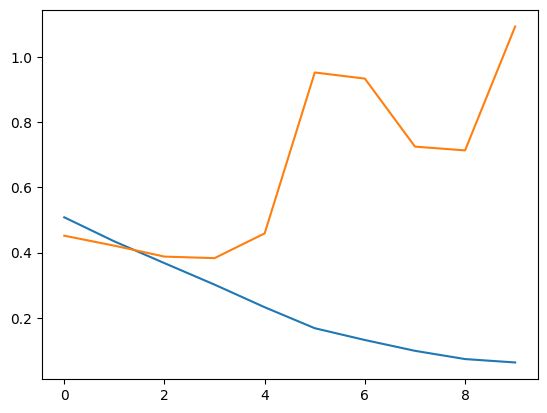

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

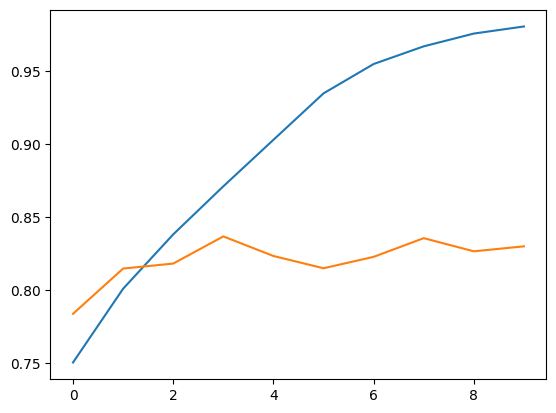

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

we can reduce overfitting by some regularization techniques
1- l1/l2 normlization 
2- data augumentation
3- batch normalization
4- dropouts

In [26]:
import pickle as pkl
pkl.dump(model,open('model.pkl','wb'))